In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
CGF=pd.read_csv(r'C:\Users\ayode\Downloads\CardioGoodFitness-1.csv')
CGF

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
CGF.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
CGF.sample(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
128,TM498,35,Female,14,Partnered,3,2,52302,53
28,TM195,25,Male,14,Partnered,2,3,45480,56
79,TM195,50,Female,16,Partnered,3,3,64809,66
105,TM498,25,Male,16,Partnered,2,3,50028,53
132,TM498,37,Female,16,Partnered,2,3,48891,85
124,TM498,33,Female,18,Single,3,4,47754,74
175,TM798,40,Male,21,Single,6,5,83416,200
140,TM798,22,Male,14,Single,4,3,48658,106
156,TM798,25,Male,20,Partnered,4,5,74701,170
95,TM498,24,Male,14,Single,3,4,48891,106


In [5]:
CGF.duplicated().sum()

0

In [6]:
CGF.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
CGF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
CGF.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [9]:
CGF.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [10]:
CGF.groupby('Product').agg({'Age':'sum','Gender':'count','Education':'sum','MaritalStatus':'count','Usage':'sum','Fitness':'sum','Income':'sum','Miles':'sum'})

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,
TM195,2284,80,1203,80,247,237,3713442,6623
TM498,1734,60,907,60,184,174,2938419,5276
TM798,1164,40,693,40,191,185,3017663,6676


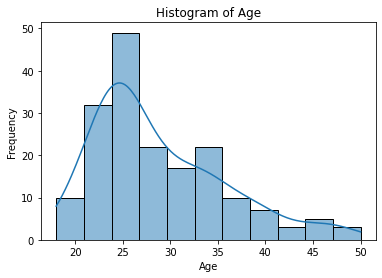

In [11]:
sns.histplot(data=CGF, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

    1. The distribution is right skewed
    2. Highest customer count are between age 24 and 26

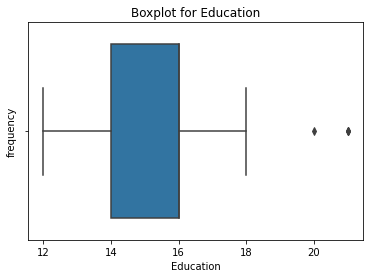

In [13]:
sns.boxplot(data=CGF, x='Education')
plt.xlabel('Education')
plt.ylabel('frequency')
plt.title('Boxplot for Education')
plt.show()

 1. The distribution is slightly skewed towrads right.
 2. There are some ourliers.
 3. We have higher number of educated customer betweem year 14 to 16

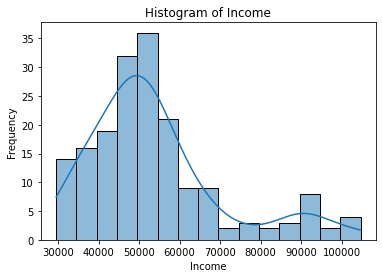

In [30]:
sns.histplot(data=CGF, x='Income', kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

1. This is a right skewed distribution
2. Less than five customers have an income od 100,000
3. The highest customer count have income between the range of 400 and 550
4. 35 customer earned 50,000

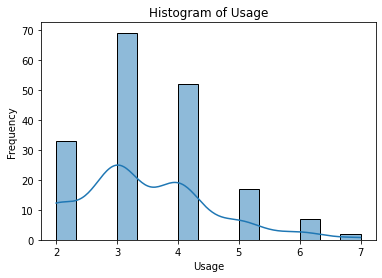

In [27]:
sns.histplot(data=CGF, x='Usage', kde=True)
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.title('Histogram of Usage')
plt.show()

1. The highest number of time customers will like to use the treadmill is 3
2. The distribution is right skewed
3.  The lowest number of time customers will like to use the treadmill is 7


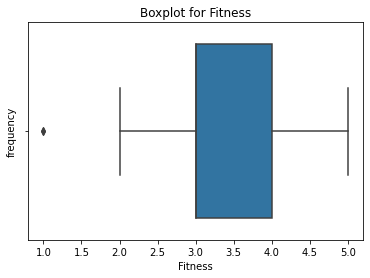

In [15]:
sns.boxplot(data=CGF, x='Fitness')
plt.xlabel('Fitness')
plt.ylabel('frequency')
plt.title('Boxplot for Fitness')
plt.show()

    1. We have more Customers gives themselves scores between 3 and 4 marks
    2. The distribution is left skewed


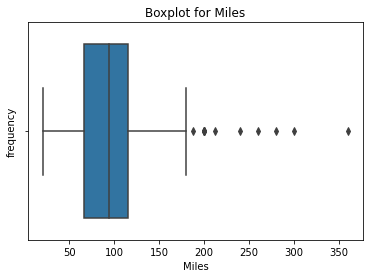

In [17]:
sns.boxplot(data=CGF, x='Miles')
plt.xlabel('Miles')
plt.ylabel('frequency')
plt.title('Boxplot for Miles')
plt.show()

1. More customers covers between 75 and 120
2. The distribution is right skewed, There are outliers.

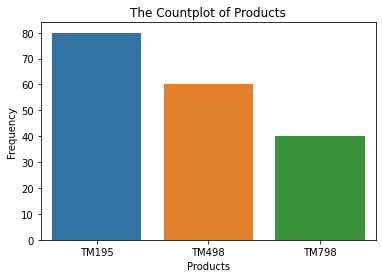

In [18]:
sns.countplot(data=CGF, x = 'Product')
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.title('The Countplot of Products')
plt.show()

1. TM195 has the highest number of customer's patronage
2. TM798 has the lowest number of patronage

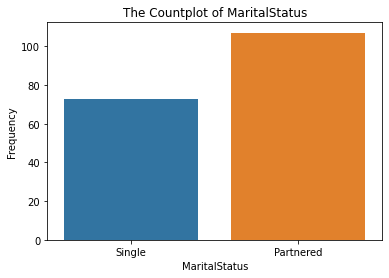

In [19]:
sns.countplot(data=CGF, x = 'MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency')
plt.title('The Countplot of MaritalStatus')
plt.show()

Partnered customer patronize the gym more


In [ ]:
# def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bin='None'):
#     f2, (ax_box2, ax_hist2)=plt.subplot(
#         nrow=2, 
#         sharex='True',
#         gripespec_kw={'height_ratio':(0.25, 0.75)},
#         fig_size=fig_size)
#     sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='violet')
#     sns.histplot(data=data, x=feature, kde=kde,ax=ax_hist2, bins=bins, palette='winter'
#     )if bins else sns.histplot(
#         data=data, x=feature, kde=kde,ax=ax_hist2
#     )
#     ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--')
#     ax_hist2.axvline(data[feature].median(), color='black', linestyle='-')

In [20]:
corr_mat=CGF[CGF.columns].corr()
corr_mat

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


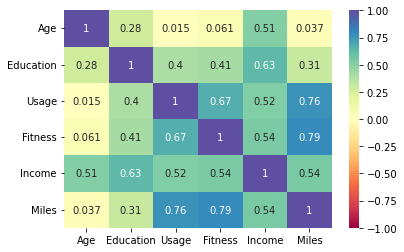

In [21]:
plt.figure()
sns.heatmap(data = corr_mat, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral');

In [ ]:
Miles correlated with Usage and Fitness highly positive 
Miles correlated with Income moderately positive
Income correlated with Age, Fitness and Education moderately positive

In [22]:
CGF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


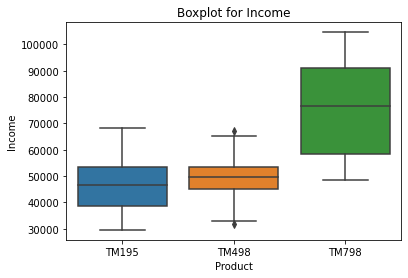

In [31]:
sns.boxplot(data=CGF, x='Product', y='Income')
plt.xlabel('Product')
plt.ylabel('Income')
plt.title('Boxplot for Income')
plt.show()

TM798 has the customer with most income

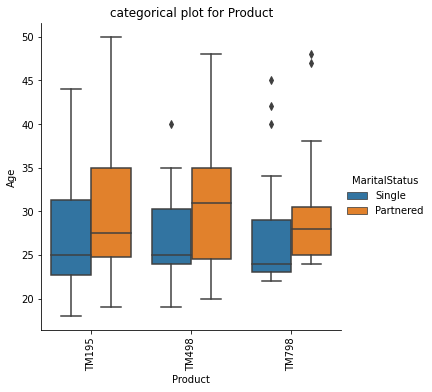

In [23]:
sns.catplot(data=CGF, x='Product', y='Age', kind='box', hue='MaritalStatus')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Age')
plt.title('categorical plot for Product')
plt.show()


    1. Products TM195 has the customer with the highest age.
    2. Partnered customer visit the fitness center more.
    3. The partnered customer have the highest age in all the products individually and combined.

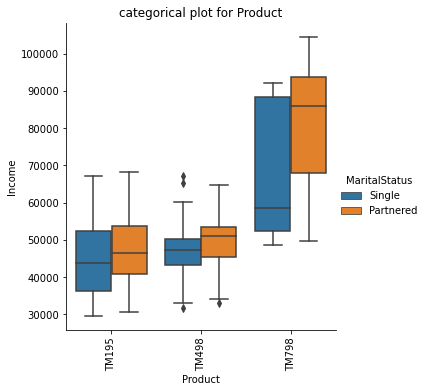

In [24]:
sns.catplot(data=CGF, x='Product', y='Income', kind='box', hue='MaritalStatus')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Income')
plt.title('categorical plot for Product')
plt.show()

TM798 has the highest income eanred by partnered and single 

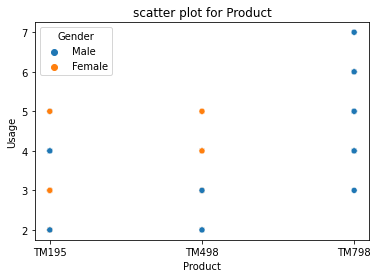

In [25]:
sns.scatterplot(data=CGF, x='Product', y='Usage', hue='Gender')
plt.xlabel('Product')
plt.ylabel('Usage')
plt.title('scatter plot for Product')
plt.show()

1. Males uses products TM798 more and the product also have the highest usage
2. The number of females that used the other two products are more than males

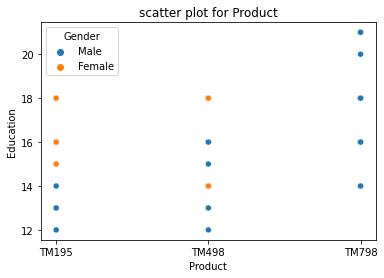

In [26]:
sns.scatterplot(data=CGF, x='Product', y='Education', hue='Gender')
plt.xlabel('Product')
plt.ylabel('Education')
plt.title('scatter plot for Product')
plt.show()

TM 798 has the highest number of educated male that uses the products
Male are more educated than the female
Product TM195 has the highest number of female customers

## General observation based on visualization
1. Educated and high income earner customers uses product TM798 more
2. Males that patronize the center are higher income earner that female
3. Partnered earn more that single customers
4. Male customers patronize the fitness center more than the female customers
5. Higher count of customer uses tradmill three times than other number of time
6. Males uses products TM798 more and the product also have the highest usage
7. Less than five customers have an income od 100,000
8. The highest customer count have income between the range of 400 and 550
9. 35 customer earned 50,000
10. Product TM798 has the highest income eanred by partnered and single 

# Recommendation
1. There should be referal scheme reward to encourage few high income earner 
that visit the fitness center to refer their family, friends and business 
partners to the center
2. There should be bonus number of exercise given to those that choose product TM798
3. There should be focus on male customers, engage them on their preferences
4. More products for couples